<a href="https://colab.research.google.com/github/goerlitz/image-classification/blob/master/catsdogs/Cats_%26_Dogs_fast-ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pathlib import Path
from fastai.vision import ImageDataBunch, get_transforms, cnn_learner
from fastai.vision.models import resnet34
from fastai.metrics import error_rate

## Download Data

In [2]:
%%time
!if [[ ! -d data ]]; then mkdir data; fi && wget http://files.fast.ai/data/dogscats.zip && unzip -qq dogscats.zip -d data/

--2019-08-19 21:40:30--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M   108MB/s    in 7.8s    

2019-08-19 21:40:43 (105 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

CPU times: user 118 ms, sys: 29.4 ms, total: 147 ms
Wall time: 23.4 s


## Inspect Data

In [3]:
!du data/ -h

22M	data/dogscats/valid/cats
26M	data/dogscats/valid/dogs
48M	data/dogscats/valid
298M	data/dogscats/test1
4.0K	data/dogscats/models
72K	data/dogscats/sample/valid/cats
104K	data/dogscats/sample/valid/dogs
216K	data/dogscats/sample/valid
156K	data/dogscats/sample/train/cats
204K	data/dogscats/sample/train/dogs
364K	data/dogscats/sample/train
584K	data/dogscats/sample
253M	data/dogscats/train/cats
295M	data/dogscats/train/dogs
548M	data/dogscats/train
893M	data/dogscats
893M	data/


In [4]:
!echo "train cats:" `ls data/dogscats/train/cats | wc -l`
!echo "train dogs:" `ls data/dogscats/train/dogs | wc -l`
!echo "validation cats:" `ls data/dogscats/valid/cats | wc -l`
!echo "validation dogs:" `ls data/dogscats/valid/dogs | wc -l`

train cats: 11500
train dogs: 11500
validation cats: 1000
validation dogs: 1000


## Load Data

In [5]:
data = ImageDataBunch.from_folder(Path("data/dogscats/"), size=224, ds_tfms=get_transforms(), seed=42, bs=64)
print(f'classes: {data.classes}')

classes: ['cats', 'dogs']


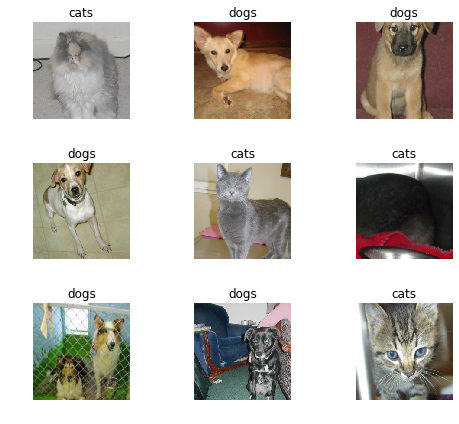

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
learn = cnn_learner(data, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 54342067.35it/s]


In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.078818,0.037272,0.015000,03:57
1,0.053318,0.025550,0.009000,03:54
2,0.037773,0.022818,0.011500,03:52
3,0.032364,0.019884,0.008500,03:52
4,0.032076,0.019273,0.008000,03:49


In [0]:
learn.save('dogscats_resnet34_stage-1')

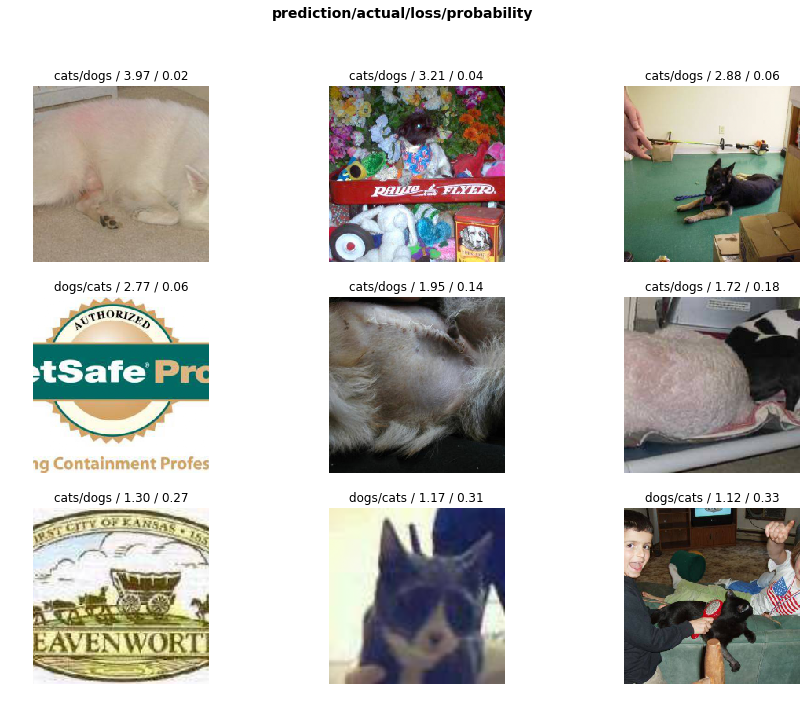

In [14]:
from fastai.vision import ClassificationInterpretation

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

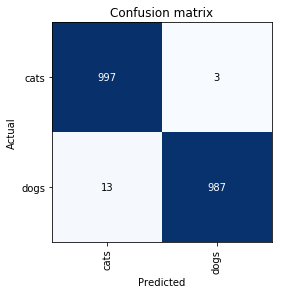

In [17]:
interp.plot_confusion_matrix(figsize=(4,4))

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


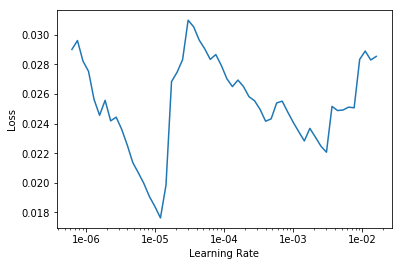

In [20]:
learn.recorder.plot()

In [21]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.045769,0.023950,0.010000,04:00
1,0.034170,0.029616,0.012000,03:58
2,0.012914,0.019671,0.008000,03:56


In [0]:
learn.save('dogscats_resnet34_stage-2')